# End-to-end data science example:
## Predicting Diabetes with Logistic Regression

[reference](https://towardsdatascience.com/end-to-end-data-science-example-predicting-diabetes-with-logistic-regression-db9bc88b4d16)

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

# Data Description

In [20]:
diabetesDF = pd.read_csv('../data/diabetes.csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
diabetesDF.shape

(768, 9)

# Data Exploration

In [22]:
corr = diabetesDF.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


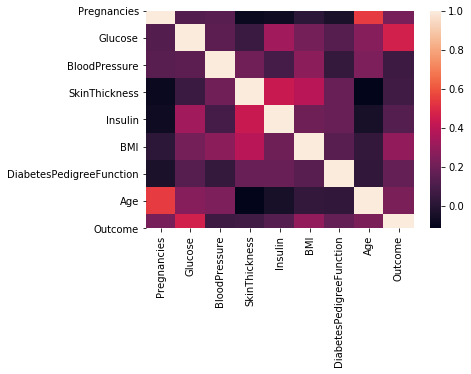

In [23]:
sns.heatmap(corr,
           xticklabels=corr.columns,
           yticklabels=corr.columns)

# Data Preparation (Splitting & Normalizing)

The data set consists of 768 patient records in total. To train our model, we will be using 650 records. We will be using 100 records for testing, and at least 18 records to cross check our model.

In [15]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:]

In [17]:
print(dfTrain.shape)
print(dfTest.shape)
print(dfCheck.shape)

(650, 9)
(100, 9)
(18, 9)


Next, we must separate the label and features (from both Training and Test datasets). In addition to that, we will convert them to numpy vector arrays as our machine learning algorithm process data in numpy array format.

In [33]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome', 1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome', 1))

As a final step before applying machine learning, we will normalize our inputs. Machine Learning models often benefit substantially from input normalization. It also makes it easier for us to understand the importance of each feature later, when we'll be looking at the model weights. We'll normalize the data so each variable has a mean of 0 and a standard deviation of 1.

In [34]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

In [35]:
trainData = (trainData - means) / stds
testData = (testData - means) / stds

# print(np.mean(trainData)) # Testing that the means are 0
# print(np.mean(testData))
# print(np.std(trainData))  # Checking that the stds are 1
# print(np.std(testData))

6.353891771700896e-17
0.0785502290298888
1.0
0.9698695471035935


# Training and Evaluating Machine Learning Models

We will now train our classification model. We'll be using a simple machine learning algorithm called *Logistic Regression*. Since the model is readily available in sklearn, 